In [1]:
'''the Image analysis for spatter area calculation'''
# Date: 2020/06/29
# @Castro

'the Image analysis for spatter area calculation'

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


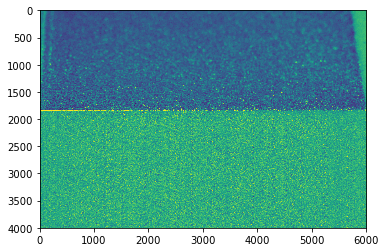

In [3]:
file = 'focus.jpg'
image = cv2.imread(file)
img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
img_gray_one = np.double(img_gray)
img_test = np.double(img_gray_one)
plt.imshow(img_gray)
plt.show()
#cv2.namedWindow('My Image to edge', cv2.WINDOW_NORMAL)
#cv2.imshow('My Image', image)
#cv2.waitKey(0)

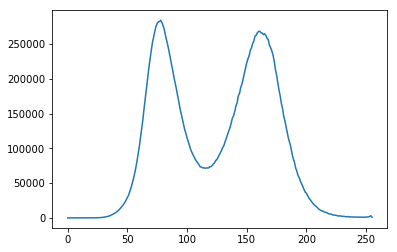

In [4]:
low_range = 1800
up_range = 4000
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

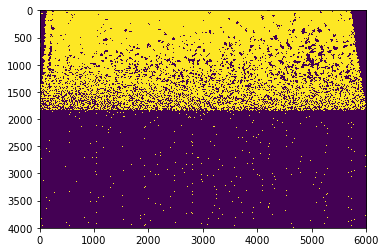

In [5]:
for i in np.arange(0,img_gray.shape[0]):
    for j in np.arange(0,img_gray.shape[1]):
        if img_gray_one[i,j] <= 50 or img_gray_one[i,j]>= 100 :
            img_test[i,j] = 0
        else:
            img_test[i,j]=255
plt.imshow(np.uint8(img_test))
plt.show()
#cv2.namedWindow('My Image to edge', cv2.WINDOW_NORMAL)
#cv2.imshow('My Image', np.uint8(img_test))
#cv2.waitKey(0)

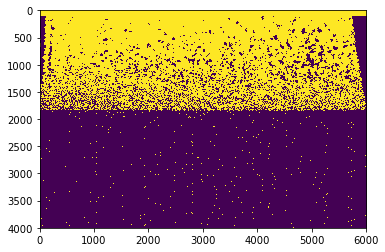

In [6]:
for i in np.arange(0,img_gray.shape[0]):
    if i >= 3998 or i<= 100:
        img_test[i,]=255
plt.imshow(img_test)
plt.show()

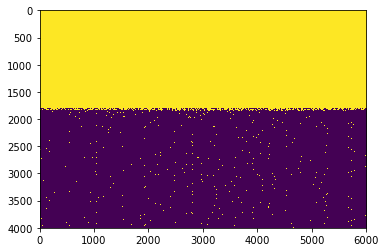

In [7]:
#img_region=np.zeros((img_gray.shpae[0],img_gray.shape[1]))

for i in np.arange(0,img_gray.shape[0]):
    if i<=low_range or i>=up_range:
        img_test[i,:] = 255
plt.imshow(np.uint8(img_test))

In [8]:
red_channel = image.copy()
for i in np.arange(low_range,up_range):
    for j in np.arange(0,image.shape[1]):
        red_channel[i,j,0]=0
        red_channel[i,j,1]=0
cv2.imshow('red',red_channel)
cv2.waitKey(0)
        

-1

In [9]:
photo = np.zeros((4000,6000,3),np.uint8)
photo[:,:,0]=255
photo[:,:,1]=255
photo[:,:,2]=255
#cv2.imshow('try',photo)
#cv2.waitKey(0)

In [10]:
try_graph = photo.copy()
try_graph[:,:,0]=0
try_graph[:,:,1]=0
try_graph[:,:,2]=0
for i in np.arange(low_range,up_range):
    for j in np.arange(0,image.shape[1]):
        try_graph[i,j,2]=img_test[i,j]
cv2.imshow('ytttt',try_graph)
cv2.waitKey(0)

-1

In [11]:
result = image.copy()
for i in np.arange(low_range,up_range):
    for j in np.arange(0,image.shape[1]):
        if img_test[i,j]!=0:
            result[i,j,0]=0
            result[i,j,1]=0
            result[i,j,2]=0
result = result+try_graph
#cv2.imshow('result',result)
#cv2.waitKey(0)

In [12]:
cv2.imwrite('out.jpg',result)

True

In [51]:
# SNR code to validate the quality of image:
'''
To explain how could we sperate the spatter and noise and 
1. calculte the SNR
2. Confidence <-> SNR
'''
def signaltonoise(Image, axis = 0, ddof = 0):
    Image = np.asanyarray(Image)
    Image_mean = Image.mean(axis)
    STDofImage = Image.std(axis = axis, ddof = ddof)
    return np.where(STDofImage == 0,0, Image_mean/STDofImage)

SNR_output = signaltonoise(cv2.imread('out.jpg'),axis= None)
imc = cv2.imread(r"E:\NCKU_experimental\Project_Eric_spatter\image_spatter\image_proces\image_spatter_area\6112.JPEG")
SNR_original = signaltonoise(cv2.imread(r"E:\NCKU_experimental\Project_Eric_spatter\image_spatter\image_proces\image_spatter_area\6112.JPEG"),axis = None)
print('SNR output:', SNR_output)
print('SNR original:', SNR_output)

SNR output: 2.80114225428822
SNR original: 2.80114225428822


In [40]:
print(cv2.__version__)

3.4.1
